In [123]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd

In [39]:
df_batch = pd.read_csv("Desktop/Northeastern University/term5, winter 2020/capston data set/batch_scores.csv")
df_employee = pd.read_csv("Desktop/Northeastern University/term5, winter 2020/capston data set/employee_profile.csv")
df_allocator = pd.read_csv("Desktop/Northeastern University/term5, winter 2020/capston data set/allocator.csv")
df_ideal = pd.read_csv("Desktop/Northeastern University/term5, winter 2020/capston data set/ideal_times.csv")
df_preprocessed = pd.read_csv("Desktop/Northeastern University/term5, winter 2020/capston data set/preprocessed_data.csv")
df_quanta = pd.read_csv("Desktop/Northeastern University/term5, winter 2020/capston data set/quanta_map.csv")
df_wheels = pd.read_csv("Desktop/Northeastern University/term5, winter 2020/capston data set/wheels.csv")


In [40]:
df_batch.head(5)

DATE    MASTER  CONSISTENCY  QUALITY_IMPACT  CAPACITY_UTILIZATION  \
0  2018-01-10  0.658322     0.600694        0.421264              0.628179   
1  2018-01-11  0.657562     0.601235        0.421830              0.628201   
2  2018-01-12  0.655990     0.601398        0.422259              0.628544   
3  2018-01-15  0.655453     0.601468        0.422970              0.629128   
4  2018-01-16  0.654158     0.601130        0.423001              0.628702   

   ADHERENCE    VOLUME EMPLOYEE  
0   0.620016  0.670133  VC6YGMH  
1   0.620144  0.670680  VC6YGMH  
2   0.620000  0.670726  VC6YGMH  
3   0.619518  0.670233  VC6YGMH  
4   0.619658  0.670067  VC6YGMH

In [41]:
df_batch.describe()

MASTER   CONSISTENCY  QUALITY_IMPACT  CAPACITY_UTILIZATION  \
count  26000.000000  26000.000000    26000.000000          26000.000000   
mean       0.473179      0.496179        0.467534              0.509249   
std        0.150168      0.179738        0.105730              0.162896   
min        0.203533      0.141669        0.240691              0.170054   
25%        0.342945      0.493578        0.423266              0.528166   
50%        0.484538      0.546837        0.476649              0.531023   
75%        0.619293      0.613568        0.554540              0.640794   
max        0.787508      0.870398        0.612725              0.729665   

          ADHERENCE        VOLUME  
count  26000.000000  26000.000000  
mean       0.596793      0.507286  
std        0.086494      0.123188  
min        0.192582      0.297752  
25%        0.568855      0.416861  
50%        0.612216      0.436125  
75%        0.641634      0.644068  
max        0.805627      0.885172

In [42]:
# checking missinh values in batch score dataset
print(df_batch.isnull().sum())

DATE                    0
MASTER                  0
CONSISTENCY             0
QUALITY_IMPACT          0
CAPACITY_UTILIZATION    0
ADHERENCE               0
VOLUME                  0
EMPLOYEE                0
dtype: int64


In [43]:
df_employee.head(5)

enaibleID Employee_ID       Emp_Full_Name                   EMAIL  \
0   UME95YW     VC6YGMH         Sarah Blake  sarahblake@company.org   
1   Y9FJQEU     RXWP49G     Alaina Gottlieb                     NaN   
2   X1K7Z4A     IGLDTCK  Wesley Shaughnessy                     NaN   
3   MUTWQD7     ZP3BTW9     Victoria Fisher                     NaN   
4   YMHCU8X     3RS6NXW       Haley Daniels                     NaN   

         Shift            Role Supervisor ID  \
0          NaN   VP Operations           NaN   
1  09:00|17:00  Sr. Operations       EGMFNQU   
2  09:00|17:00  Sr. Operations       EGMFNQU   
3  09:00|17:00   Operations II       EGMFNQU   
4  09:00|17:00    Operations I       EGMFNQU   

                       Divisions/Department  \
0                                Operations   
1  Plant Operations East Coast / Operations   
2  Plant Operations East Coast / Operations   
3  Plant Operations East Coast / Operations   
4  Plant Operations East Coast / Operations   

                                             Systems  
0  {'Outlook': 'sarahblake@company.org', 'ERP': '...  
1  {'Outlook': 'alainagottlieb@company.org', 'ERP...  
2  {'Outlook': 'wesleyshaughnessy@company.org', '...  
3  {'Outlook': 'victoriafisher@company.org', 'ERP...  
4  {'Outlook': 'haleydaniels@company.org', 'ERP':...

In [44]:
#Removing missinh values of employee profile dataset 
df_employee = df_employee.dropna(axis=0, subset=['Shift','Supervisor ID'])

In [45]:
# checking missinh values in employee profile dataset
#Leaving the missing values of the email variable intact as we are not working with email
print(df_employee.isnull().sum())

enaibleID                0
Employee_ID              0
Emp_Full_Name            0
EMAIL                   45
Shift                    0
Role                     0
Supervisor ID            0
Divisions/Department     0
Systems                  0
dtype: int64


In [46]:
df_allocator.head(5)

TRIGGER   OBSERVED  OPTIMIZED  FREQUENCY
0     KA-Panda | Sales Rep  29.976497  25.650000       4659
1  KA-Al Nahdi | Sales Rep  15.775425  13.933333       2963
2      West-MT | Sales Rep  40.527526  31.666667       2896
3   KA-Al Dawa | Sales Rep  17.877527  14.400000       2305
4    KA-Othaim | Sales Rep  30.415285  24.966667       2255

In [47]:
#Spliting the Trigger variable
# new data frame with split value columns 
new1 = df_allocator["TRIGGER"].str.split("|", n = 1, expand = True) 
  
# making separate TRIGGER type column from new data frame 
df_allocator["TRIGGER_type"]= new1[0] 
  
# making separate Department column from new data frame 
df_allocator["Department"]= new1[1] 
  
# Dropping Divisions/Department columns 
df_allocator.drop(columns =["TRIGGER"], inplace = True) 
  
# df display 
df_allocator.head(10) 

OBSERVED  OPTIMIZED  FREQUENCY     TRIGGER_type  Department
0  29.976497  25.650000       4659        KA-Panda    Sales Rep
1  15.775425  13.933333       2963     KA-Al Nahdi    Sales Rep
2  40.527526  31.666667       2896         West-MT    Sales Rep
3  17.877527  14.400000       2305      KA-Al Dawa    Sales Rep
4  30.415285  24.966667       2255       KA-Othaim    Sales Rep
5  26.617908  19.866667       2148  East-WSL-TT-PS    Sales Rep
6  38.514519  30.908333       1676       KA-Danube    Sales Rep
7  37.130193  28.341667       1640  West-WSL-TT-PS    Sales Rep
8  17.918695  15.208333       1594      Cent-Pharm    Sales Rep
9  16.800328  13.716667       1323     West-Pharma    Sales Rep

In [48]:
# checking missinh values in allocator dataset
print(df_allocator.isnull().sum())

OBSERVED        0
OPTIMIZED       0
FREQUENCY       0
TRIGGER_type    0
Department      0
dtype: int64


In [49]:
df_allocator.describe()

OBSERVED   OPTIMIZED    FREQUENCY
count   76.000000   76.000000    76.000000
mean    34.843936   24.867434   432.921053
std     33.639732   21.413979   865.425965
min      4.050000    1.866667     1.000000
25%     17.843860   14.329167     7.250000
50%     26.858545   18.412500    33.000000
75%     37.476274   27.306250   310.250000
max    229.041176  122.233333  4659.000000

In [50]:
df_ideal.head(5)

TRIGGER_GROUP  IDEAL_TIME         SD          T1          T2
0              0  983.397279  12.421210  2019-07-31  2019-07-21
1              1  251.816061   8.152879  2019-07-31  2019-07-21
2              2    1.329617   7.472034  2019-07-31  2019-07-21
3              3   29.927754  69.261233  2019-07-31  2019-07-21
4              4    3.274099   5.805512  2019-07-31  2019-07-21

In [51]:
# checking missinh values in ideal times dataset
print(df_ideal.isnull().sum())

TRIGGER_GROUP    0
IDEAL_TIME       0
SD               0
T1               0
T2               0
dtype: int64


In [52]:
df_ideal.describe()

TRIGGER_GROUP    IDEAL_TIME            SD
count    3600.000000  3.600000e+03  3.600000e+03
mean       24.500000  2.388485e+46  5.080174e+82
std        14.432874  1.433088e+48  3.048104e+84
min         0.000000  1.124223e+00  1.061762e+00
25%        12.000000  3.989825e+00  4.152640e+00
50%        24.500000  1.610970e+01  1.643915e+01
75%        37.000000  2.432628e+02  1.964348e+02
max        49.000000  8.598528e+49  1.828863e+86

In [53]:
df_preprocessed.head(5)

DATE          ID       EMPLOYEE       TIME  \
0  2018-12-01 11:13:37  28621848.0     Alex Jaime  20.033333   
1  2018-12-02 06:50:06  77700005.0     Alex Jaime  31.983333   
2  2018-12-02 06:51:06  77700006.0    Thomas Baju  39.666667   
3  2018-12-02 06:57:39  28621749.0  Hani Abu Rizq  15.616667   
4  2018-12-02 06:59:52  77700567.0   Mohamed Emam  18.550000   

                         TRIGGER  
0            Cent-MT | Sales Rep  
1           KA-Panda | Sales Rep  
2           KA-Panda | Sales Rep  
3  Center-WSL-TT-PS | Supervisor  
4        KA-Al Nahdi | Sales Rep

In [54]:
#Spliting the Trigger variable
# new data frame with split value columns 
new2 = df_preprocessed["TRIGGER"].str.split("|", n = 1, expand = True) 
  
# making separate TRIGGER type column from new data frame 
df_preprocessed["TRIGGER_type"]= new2[0] 
  
# making separate Department column from new data frame 
df_preprocessed["Department"]= new2[1] 
  
# Dropping Divisions/Department columns 
df_preprocessed.drop(columns =["TRIGGER"], inplace = True) 
  
# df display 
df_preprocessed.head(10) 

DATE          ID           EMPLOYEE       TIME  \
0  2018-12-01 11:13:37  28621848.0         Alex Jaime  20.033333   
1  2018-12-02 06:50:06  77700005.0         Alex Jaime  31.983333   
2  2018-12-02 06:51:06  77700006.0        Thomas Baju  39.666667   
3  2018-12-02 06:57:39  28621749.0      Hani Abu Rizq  15.616667   
4  2018-12-02 06:59:52  77700567.0       Mohamed Emam  18.550000   
5  2018-12-02 07:14:26  28621751.0      Hani Abu Rizq  14.800000   
6  2018-12-02 07:27:41  77700468.0  Abdulaziz Mohamed  20.833333   
7  2018-12-02 07:27:48  77700212.0    Ismail Lahlouba  38.116667   
8  2018-12-02 07:30:20  77702725.0     Sabri Ezzelden  32.750000   
9  2018-12-02 07:31:31  77700424.0   Abdulhameed Mady  23.900000   

        TRIGGER_type   Department  
0           Cent-MT     Sales Rep  
1          KA-Panda     Sales Rep  
2          KA-Panda     Sales Rep  
3  Center-WSL-TT-PS    Supervisor  
4       KA-Al Nahdi     Sales Rep  
5  Center-WSL-TT-PS    Supervisor  
6         KA-Othaim     Sales Rep  
7          KA-Panda     Sales Rep  
8       West-Pharma    Supervisor  
9         KA-Othaim     Sales Rep

In [55]:
# checking missinh values in preprocessed data dataset
print(df_preprocessed.isnull().sum())

DATE            0
ID              0
EMPLOYEE        0
TIME            0
TRIGGER_type    0
Department      0
dtype: int64


In [56]:
df_preprocessed.describe()

ID          TIME
count  3.290200e+04  32902.000000
mean   5.103860e+07     29.325462
std    2.444677e+07     78.146965
min    2.861540e+07      0.066667
25%    2.862203e+07     14.883333
50%    2.863591e+07     21.716667
75%    7.770059e+07     33.150000
max    7.770320e+07  12712.283333

In [57]:
df_quanta.head(5)

TRIGGER  TRIGGER_GROUP
0    inter: 1             84
1   inter: 10             28
2  inter: 100             49
3  inter: 101             20
4  inter: 102             72

In [58]:
# checking missinh values in quanta map dataset
print(df_quanta.isnull().sum())

TRIGGER          0
TRIGGER_GROUP    0
dtype: int64


In [59]:
df_quanta.describe()

TRIGGER_GROUP
count     851.000000
mean       54.809636
std        31.964266
min         1.000000
25%        23.000000
50%        62.000000
75%        86.000000
max        99.000000

In [60]:
#imputing the NULL values with 0
df_wheels = df_wheels.fillna(0)
df_wheels.head(10)

EMPLOYEE        DATE    0    1    2    3    4    5    6    7  ...  \
0  Employee inter 1  2019-12-23  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
1  Employee inter 1  2019-07-03  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2  Employee inter 1  2019-12-05  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
3  Employee inter 1  2019-08-01  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
4  Employee inter 1  2019-11-23  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
5  Employee inter 1  2019-07-29  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
6  Employee inter 1  2019-09-08  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
7  Employee inter 1  2019-08-23  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
8  Employee inter 1  2019-10-25  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
9  Employee inter 1  2019-07-17  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   

   1430  1431  1432  1433  1434  1435  1436  1437  1438  1439  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
5   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
6   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
7   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
8   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
9   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[10 rows x 1442 columns]

In [61]:
# checking missinh values in wheels dataset
print(df_wheels.isnull().sum())

EMPLOYEE    0
DATE        0
0           0
1           0
2           0
           ..
1435        0
1436        0
1437        0
1438        0
1439        0
Length: 1442, dtype: int64


In [62]:
df_wheels.describe()

0       1       2       3       4       5       6       7       8  \
count  1450.0  1450.0  1450.0  1450.0  1450.0  1450.0  1450.0  1450.0  1450.0   
mean      0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
std       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
min       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
25%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
50%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
75%       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
max       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

            9  ...         1430         1431         1432         1433  \
count  1450.0  ...  1450.000000  1450.000000  1450.000000  1450.000000   
mean      0.0  ...     0.001946     0.001946     0.001946     0.001946   
std       0.0  ...     0.042828     0.042828     0.042828     0.042828   
min       0.0  ...     0.000000     0.000000     0.000000     0.000000   
25%       0.0  ...     0.000000     0.000000     0.000000     0.000000   
50%       0.0  ...     0.000000     0.000000     0.000000     0.000000   
75%       0.0  ...     0.000000     0.000000     0.000000     0.000000   
max       0.0  ...     0.985398     0.985398     0.985398     0.985398   

              1434         1435         1436         1437         1438  \
count  1450.000000  1450.000000  1450.000000  1450.000000  1450.000000   
mean      0.001946     0.001946     0.001946     0.001946     0.001946   
std       0.042828     0.042828     0.042828     0.042828     0.042828   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       0.985398     0.985398     0.985398     0.985398     0.985398   

              1439  
count  1450.000000  
mean      0.001946  
std       0.042828  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       0.985398  

[8 rows x 1440 columns]

In [63]:
#combining employee profile and batch score datasets
df4 = pd.merge(df_employee, df_batch, left_on='Employee_ID', right_on='EMPLOYEE', how='inner',indicator=True)
df4.head(10)

enaibleID Employee_ID    Emp_Full_Name EMAIL        Shift            Role  \
0   Y9FJQEU     RXWP49G  Alaina Gottlieb   NaN  09:00|17:00  Sr. Operations   
1   Y9FJQEU     RXWP49G  Alaina Gottlieb   NaN  09:00|17:00  Sr. Operations   
2   Y9FJQEU     RXWP49G  Alaina Gottlieb   NaN  09:00|17:00  Sr. Operations   
3   Y9FJQEU     RXWP49G  Alaina Gottlieb   NaN  09:00|17:00  Sr. Operations   
4   Y9FJQEU     RXWP49G  Alaina Gottlieb   NaN  09:00|17:00  Sr. Operations   
5   Y9FJQEU     RXWP49G  Alaina Gottlieb   NaN  09:00|17:00  Sr. Operations   
6   Y9FJQEU     RXWP49G  Alaina Gottlieb   NaN  09:00|17:00  Sr. Operations   
7   Y9FJQEU     RXWP49G  Alaina Gottlieb   NaN  09:00|17:00  Sr. Operations   
8   Y9FJQEU     RXWP49G  Alaina Gottlieb   NaN  09:00|17:00  Sr. Operations   
9   Y9FJQEU     RXWP49G  Alaina Gottlieb   NaN  09:00|17:00  Sr. Operations   

  Supervisor ID                      Divisions/Department  \
0       EGMFNQU  Plant Operations East Coast / Operations   
1       EGMFNQU  Plant Operations East Coast / Operations   
2       EGMFNQU  Plant Operations East Coast / Operations   
3       EGMFNQU  Plant Operations East Coast / Operations   
4       EGMFNQU  Plant Operations East Coast / Operations   
5       EGMFNQU  Plant Operations East Coast / Operations   
6       EGMFNQU  Plant Operations East Coast / Operations   
7       EGMFNQU  Plant Operations East Coast / Operations   
8       EGMFNQU  Plant Operations East Coast / Operations   
9       EGMFNQU  Plant Operations East Coast / Operations   

                                             Systems        DATE    MASTER  \
0  {'Outlook': 'alainagottlieb@company.org', 'ERP...  2018-01-10  0.658322   
1  {'Outlook': 'alainagottlieb@company.org', 'ERP...  2018-01-11  0.657562   
2  {'Outlook': 'alainagottlieb@company.org', 'ERP...  2018-01-12  0.655990   
3  {'Outlook': 'alainagottlieb@company.org', 'ERP...  2018-01-15  0.655453   
4  {'Outlook': 'alainagottlieb@company.org', 'ERP...  2018-01-16  0.654158   
5  {'Outlook': 'alainagottlieb@company.org', 'ERP...  2018-01-17  0.654341   
6  {'Outlook': 'alainagottlieb@company.org', 'ERP...  2018-01-18  0.654452   
7  {'Outlook': 'alainagottlieb@company.org', 'ERP...  2018-01-19  0.654544   
8  {'Outlook': 'alainagottlieb@company.org', 'ERP...  2018-01-22  0.654736   
9  {'Outlook': 'alainagottlieb@company.org', 'ERP...  2018-01-23  0.655429   

   CONSISTENCY  QUALITY_IMPACT  CAPACITY_UTILIZATION  ADHERENCE    VOLUME  \
0     0.600694        0.421264              0.628179   0.620016  0.670133   
1     0.601235        0.421830              0.628201   0.620144  0.670680   
2     0.601398        0.422259              0.628544   0.620000  0.670726   
3     0.601468        0.422970              0.629128   0.619518  0.670233   
4     0.601130        0.423001              0.628702   0.619658  0.670067   
5     0.600744        0.423605              0.629614   0.619706  0.670568   
6     0.600717        0.423124              0.630374   0.619690  0.670753   
7     0.600427        0.422960              0.630095   0.619627  0.670288   
8     0.601111        0.423355              0.630432   0.619140  0.669259   
9     0.601406        0.423617              0.630806   0.619749  0.669558   

  EMPLOYEE _merge  
0  RXWP49G   both  
1  RXWP49G   both  
2  RXWP49G   both  
3  RXWP49G   both  
4  RXWP49G   both  
5  RXWP49G   both  
6  RXWP49G   both  
7  RXWP49G   both  
8  RXWP49G   both  
9  RXWP49G   both

In [64]:
#Removing variables that are not required for our analysis
df_combine= df4.drop(['EMAIL','Shift','Systems','EMPLOYEE','_merge'],axis=1)
df_combine.head(10)


enaibleID Employee_ID    Emp_Full_Name            Role Supervisor ID  \
0   Y9FJQEU     RXWP49G  Alaina Gottlieb  Sr. Operations       EGMFNQU   
1   Y9FJQEU     RXWP49G  Alaina Gottlieb  Sr. Operations       EGMFNQU   
2   Y9FJQEU     RXWP49G  Alaina Gottlieb  Sr. Operations       EGMFNQU   
3   Y9FJQEU     RXWP49G  Alaina Gottlieb  Sr. Operations       EGMFNQU   
4   Y9FJQEU     RXWP49G  Alaina Gottlieb  Sr. Operations       EGMFNQU   
5   Y9FJQEU     RXWP49G  Alaina Gottlieb  Sr. Operations       EGMFNQU   
6   Y9FJQEU     RXWP49G  Alaina Gottlieb  Sr. Operations       EGMFNQU   
7   Y9FJQEU     RXWP49G  Alaina Gottlieb  Sr. Operations       EGMFNQU   
8   Y9FJQEU     RXWP49G  Alaina Gottlieb  Sr. Operations       EGMFNQU   
9   Y9FJQEU     RXWP49G  Alaina Gottlieb  Sr. Operations       EGMFNQU   

                       Divisions/Department        DATE    MASTER  \
0  Plant Operations East Coast / Operations  2018-01-10  0.658322   
1  Plant Operations East Coast / Operations  2018-01-11  0.657562   
2  Plant Operations East Coast / Operations  2018-01-12  0.655990   
3  Plant Operations East Coast / Operations  2018-01-15  0.655453   
4  Plant Operations East Coast / Operations  2018-01-16  0.654158   
5  Plant Operations East Coast / Operations  2018-01-17  0.654341   
6  Plant Operations East Coast / Operations  2018-01-18  0.654452   
7  Plant Operations East Coast / Operations  2018-01-19  0.654544   
8  Plant Operations East Coast / Operations  2018-01-22  0.654736   
9  Plant Operations East Coast / Operations  2018-01-23  0.655429   

   CONSISTENCY  QUALITY_IMPACT  CAPACITY_UTILIZATION  ADHERENCE    VOLUME  
0     0.600694        0.421264              0.628179   0.620016  0.670133  
1     0.601235        0.421830              0.628201   0.620144  0.670680  
2     0.601398        0.422259              0.628544   0.620000  0.670726  
3     0.601468        0.422970              0.629128   0.619518  0.670233  
4     0.601130        0.423001              0.628702   0.619658  0.670067  
5     0.600744        0.423605              0.629614   0.619706  0.670568  
6     0.600717        0.423124              0.630374   0.619690  0.670753  
7     0.600427        0.422960              0.630095   0.619627  0.670288  
8     0.601111        0.423355              0.630432   0.619140  0.669259  
9     0.601406        0.423617              0.630806   0.619749  0.669558

In [65]:
# new data frame with split value columns 
new = df_combine["Divisions/Department"].str.split("/", n = 1, expand = True) 
  
# making separate Divisions column from new data frame 
df_combine["Divisions"]= new[0] 
  
# making separate Department column from new data frame 
df_combine["Department"]= new[1] 
  
# Dropping Divisions/Department columns 
df_combine.drop(columns =["Divisions/Department"], inplace = True) 
  
# df display 
df_combine.head(10) 

enaibleID Employee_ID    Emp_Full_Name            Role Supervisor ID  \
0   Y9FJQEU     RXWP49G  Alaina Gottlieb  Sr. Operations       EGMFNQU   
1   Y9FJQEU     RXWP49G  Alaina Gottlieb  Sr. Operations       EGMFNQU   
2   Y9FJQEU     RXWP49G  Alaina Gottlieb  Sr. Operations       EGMFNQU   
3   Y9FJQEU     RXWP49G  Alaina Gottlieb  Sr. Operations       EGMFNQU   
4   Y9FJQEU     RXWP49G  Alaina Gottlieb  Sr. Operations       EGMFNQU   
5   Y9FJQEU     RXWP49G  Alaina Gottlieb  Sr. Operations       EGMFNQU   
6   Y9FJQEU     RXWP49G  Alaina Gottlieb  Sr. Operations       EGMFNQU   
7   Y9FJQEU     RXWP49G  Alaina Gottlieb  Sr. Operations       EGMFNQU   
8   Y9FJQEU     RXWP49G  Alaina Gottlieb  Sr. Operations       EGMFNQU   
9   Y9FJQEU     RXWP49G  Alaina Gottlieb  Sr. Operations       EGMFNQU   

         DATE    MASTER  CONSISTENCY  QUALITY_IMPACT  CAPACITY_UTILIZATION  \
0  2018-01-10  0.658322     0.600694        0.421264              0.628179   
1  2018-01-11  0.657562     0.601235        0.421830              0.628201   
2  2018-01-12  0.655990     0.601398        0.422259              0.628544   
3  2018-01-15  0.655453     0.601468        0.422970              0.629128   
4  2018-01-16  0.654158     0.601130        0.423001              0.628702   
5  2018-01-17  0.654341     0.600744        0.423605              0.629614   
6  2018-01-18  0.654452     0.600717        0.423124              0.630374   
7  2018-01-19  0.654544     0.600427        0.422960              0.630095   
8  2018-01-22  0.654736     0.601111        0.423355              0.630432   
9  2018-01-23  0.655429     0.601406        0.423617              0.630806   

   ADHERENCE    VOLUME                     Divisions   Department  
0   0.620016  0.670133  Plant Operations East Coast    Operations  
1   0.620144  0.670680  Plant Operations East Coast    Operations  
2   0.620000  0.670726  Plant Operations East Coast    Operations  
3   0.619518  0.670233  Plant Operations East Coast    Operations  
4   0.619658  0.670067  Plant Operations East Coast    Operations  
5   0.619706  0.670568  Plant Operations East Coast    Operations  
6   0.619690  0.670753  Plant Operations East Coast    Operations  
7   0.619627  0.670288  Plant Operations East Coast    Operations  
8   0.619140  0.669259  Plant Operations East Coast    Operations  
9   0.619749  0.669558  Plant Operations East Coast    Operations

In [66]:
#Maryam's Part

In [171]:
# Draw Plot
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y)
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

In [172]:
Employee_ID = np.unique(df_combine.Employee_ID)
Employee_ID

array(['0LMQU64', '1OG9UKJ', '2CBWHZR', '2RTA036', '3RS6NXW', '3WY5JPB',
       '4WGQ5RS', '61MGAS9', '68BINCK', '6D0BFPX', '7AQK3HR', '7OAQ2BP',
       '895D7R0', '8V2UI5O', 'BF5LHKA', 'C8W3OYT', 'DJ2RK1V', 'GJHQ01Z',
       'GOAJTKB', 'GTIS2N7', 'IGLDTCK', 'IH6KTXJ', 'JK05V49', 'MUNCPTF',
       'MV2SK7B', 'NMLBF4I', 'P2T3014', 'P9EGZI7', 'Q0RA7NC', 'RC2G3BD',
       'RXWP49G', 'S8MF57G', 'SECV6O2', 'SNE7MQ6', 'TN7DKC5', 'TNU1ZFQ',
       'U125DLT', 'UBFAZXY', 'VFSYG6O', 'VTKPXQZ', 'WCV2TE5', 'WGE2HQ3',
       'X3SDFH2', 'X7VP3ZL', 'XEB6YD2', 'XGJ36K1', 'Y4R3025', 'YKQL3GX',
       'ZP3BTW9'], dtype=object)

In [200]:
#individual for each employee ID=RXWP49G
individual1= df_combine.loc[df_combine['Employee_ID'] == 'RXWP49G']
df1= individual1[['MASTER','CONSISTENCY','QUALITY_IMPACT','CAPACITY_UTILIZATION','ADHERENCE','VOLUME','DATE']]
df1

MASTER  CONSISTENCY  QUALITY_IMPACT  CAPACITY_UTILIZATION  ADHERENCE  \
0    0.658322     0.600694        0.421264              0.628179   0.620016   
1    0.657562     0.601235        0.421830              0.628201   0.620144   
2    0.655990     0.601398        0.422259              0.628544   0.620000   
3    0.655453     0.601468        0.422970              0.629128   0.619518   
4    0.654158     0.601130        0.423001              0.628702   0.619658   
..        ...          ...             ...                   ...        ...   
515  0.620814     0.683927        0.543570              0.668298   0.732950   
516  0.620440     0.684104        0.544325              0.668524   0.734200   
517  0.619538     0.684658        0.545660              0.669101   0.734996   
518  0.619955     0.685122        0.546446              0.668987   0.735274   
519  0.619765     0.685424        0.546893              0.669032   0.734854   

       VOLUME        DATE  
0    0.670133  2018-01-10  
1    0.670680  2018-01-11  
2    0.670726  2018-01-12  
3    0.670233  2018-01-15  
4    0.670067  2018-01-16  
..        ...         ...  
515  0.631863  2020-01-01  
516  0.631650  2020-01-02  
517  0.630826  2020-01-03  
518  0.630390  2020-01-06  
519  0.630665  2020-01-07  

[520 rows x 7 columns]

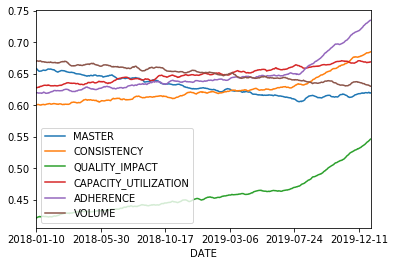

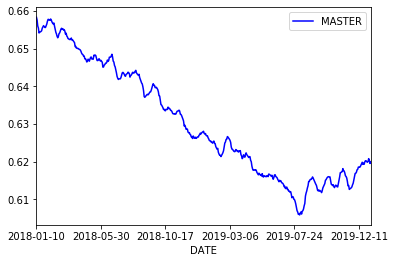

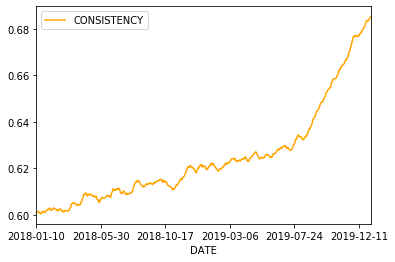

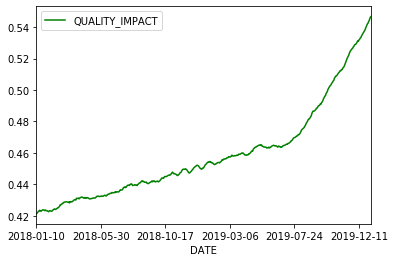

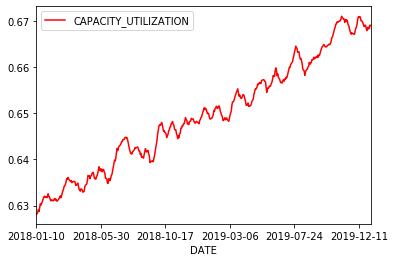

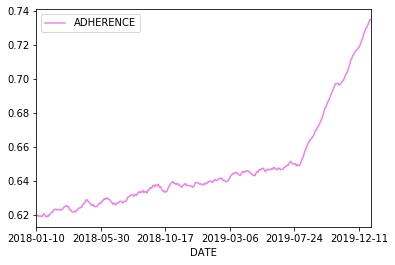

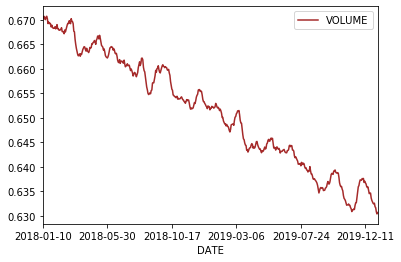

In [128]:
import matplotlib.pyplot as plt
df1.plot(x= 'DATE', y=['MASTER','CONSISTENCY','QUALITY_IMPACT','CAPACITY_UTILIZATION','ADHERENCE','VOLUME'])
df1.plot(x= 'DATE', y='MASTER',color='blue')
df1.plot(x= 'DATE', y='CONSISTENCY', color='orange')
df1.plot(x= 'DATE', y='QUALITY_IMPACT', color= 'green')
df1.plot(x= 'DATE', y='CAPACITY_UTILIZATION',color='red')
df1.plot(x= 'DATE', y='ADHERENCE', color='violet')
df1.plot(x= 'DATE', y='VOLUME', color='brown')

plt.show()

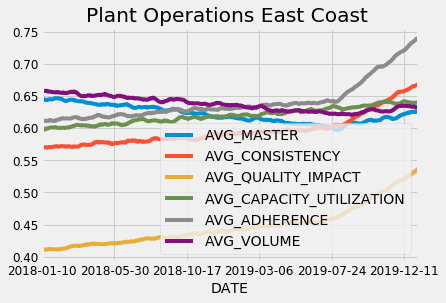

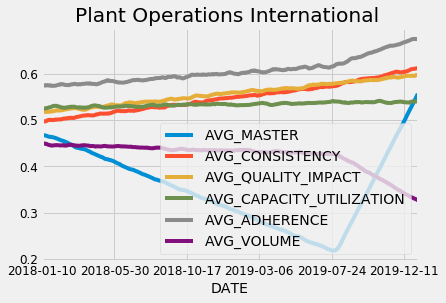

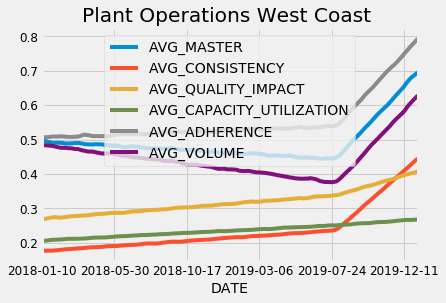

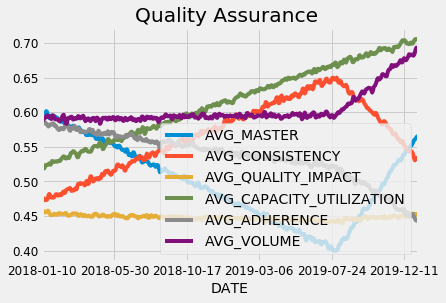

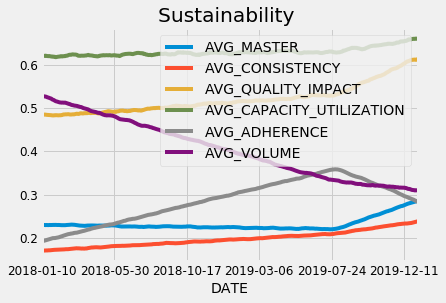

In [165]:
#group, Average
Divisions = np.unique(df_combine.Divisions)
for i in np.arange(len(Divisions)):
    df_temp= df_combine.loc[df_combine['Divisions'] == Divisions[i]]
    df_temp1=np.unique(df_temp['DATE'])
    column_names= ["DATE","AVG_MASTER","AVG_CONSISTENCY","AVG_QUALITY_IMPACT","AVG_CAPACITY_UTILIZATION","AVG_ADHERENCE","AVG_VOLUME"]
    DT=pd.DataFrame(index=np.arange(len(df_temp1)),columns = column_names)
    for j in np.arange(len(df_temp1)):
        DT.iloc[j]['DATE']= df_temp1[j]
        dt1= df_temp.loc[df_temp['DATE'] == df_temp1[j]]
        DT.iloc[j]['AVG_MASTER']= np.mean(dt1.MASTER)
        DT.iloc[j]['AVG_CONSISTENCY']= np.mean(dt1.CONSISTENCY)
        DT.iloc[j]['AVG_QUALITY_IMPACT']= np.mean(dt1.QUALITY_IMPACT)
        DT.iloc[j]['AVG_CAPACITY_UTILIZATION']= np.mean(dt1.CAPACITY_UTILIZATION)
        DT.iloc[j]['AVG_ADHERENCE']= np.mean(dt1.ADHERENCE)
        DT.iloc[j]['AVG_VOLUME']= np.mean(dt1.VOLUME)

    
    DT.plot(x= 'DATE', y=['AVG_MASTER','AVG_CONSISTENCY','AVG_QUALITY_IMPACT','AVG_CAPACITY_UTILIZATION','AVG_ADHERENCE','AVG_VOLUME'], title=Divisions[i])  
    plt.show()

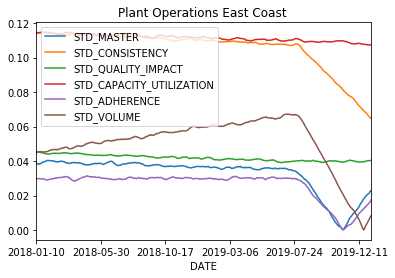

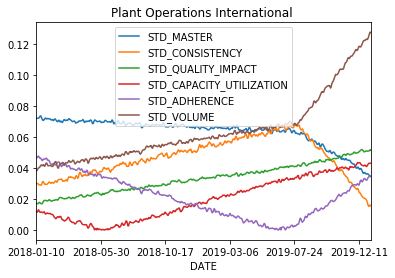

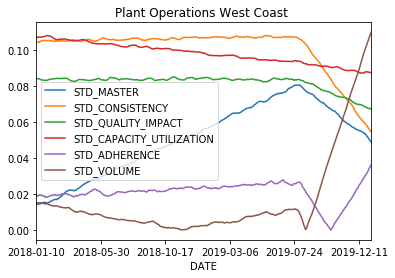

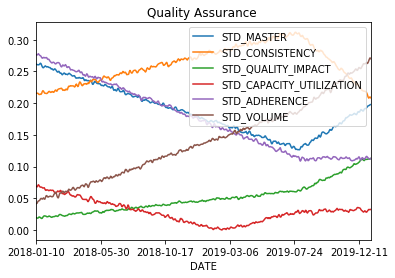

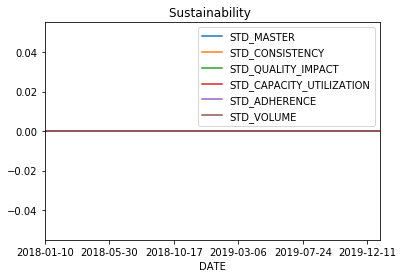

In [99]:
#group, STD
Divisions = np.unique(df_combine.Divisions)
for i in np.arange(len(Divisions)):
    df_temp= df_combine.loc[df_combine['Divisions'] == Divisions[i]]
    df_temp1=np.unique(df_temp['DATE'])
    column_names= ["DATE","STD_MASTER","STD_CONSISTENCY","STD_QUALITY_IMPACT","STD_CAPACITY_UTILIZATION","STD_ADHERENCE","STD_VOLUME"]
    DT=pd.DataFrame(index=np.arange(len(df_temp1)),columns = column_names)
    for j in np.arange(len(df_temp1)):
        DT.iloc[j]['DATE']= df_temp1[j]
        dt1= df_temp.loc[df_temp['DATE'] == df_temp1[j]]
        DT.iloc[j]['STD_MASTER']= np.std(dt1.MASTER)
        DT.iloc[j]['STD_CONSISTENCY']= np.std(dt1.CONSISTENCY)
        DT.iloc[j]['STD_QUALITY_IMPACT']= np.std(dt1.QUALITY_IMPACT)
        DT.iloc[j]['STD_CAPACITY_UTILIZATION']= np.std(dt1.CAPACITY_UTILIZATION)
        DT.iloc[j]['STD_ADHERENCE']= np.std(dt1.ADHERENCE)
        DT.iloc[j]['STD_VOLUME']= np.std(dt1.VOLUME)
    
    DT.plot(x= 'DATE', y=['STD_MASTER','STD_CONSISTENCY','STD_QUALITY_IMPACT','STD_CAPACITY_UTILIZATION','STD_ADHERENCE','STD_VOLUME'], title=Divisions[i])  
    plt.show()

In [ ]:
# forecasting

In [179]:
conda install -c conda-forge fbprophet 

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [259]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [229]:
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df1.MASTER.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -2.203882
p-value: 0.204840


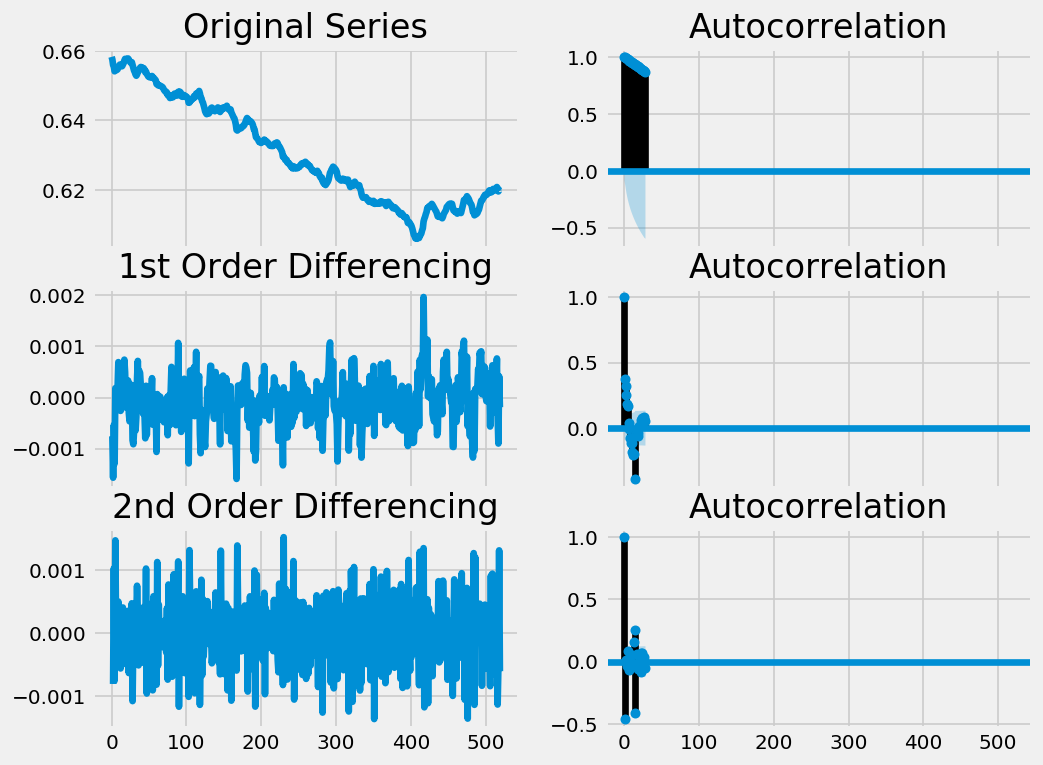

In [304]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df1.MASTER); axes[0, 0].set_title('Original Series')
plot_acf(df1.MASTER, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df1.MASTER.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df1.MASTER.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df1.MASTER.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df1.MASTER.diff().diff().dropna(), ax=axes[2, 1])


plt.show()


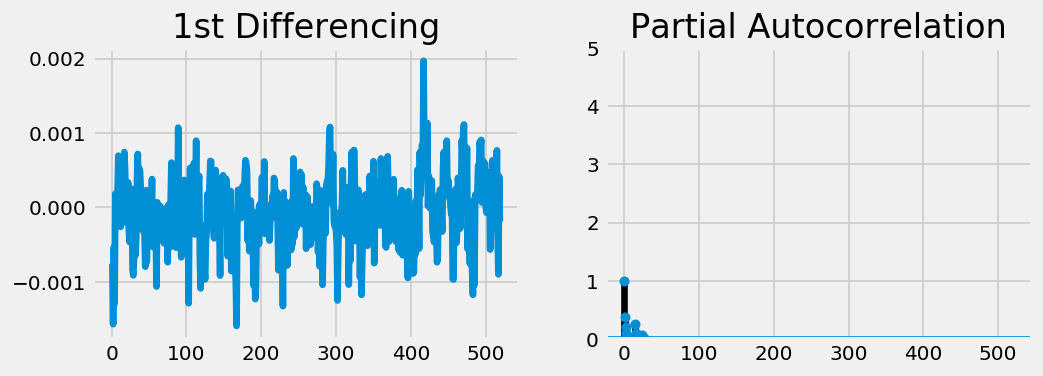

In [249]:
#AR
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df1.MASTER.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df1.MASTER.diff().dropna(), ax=axes[1])

plt.show()


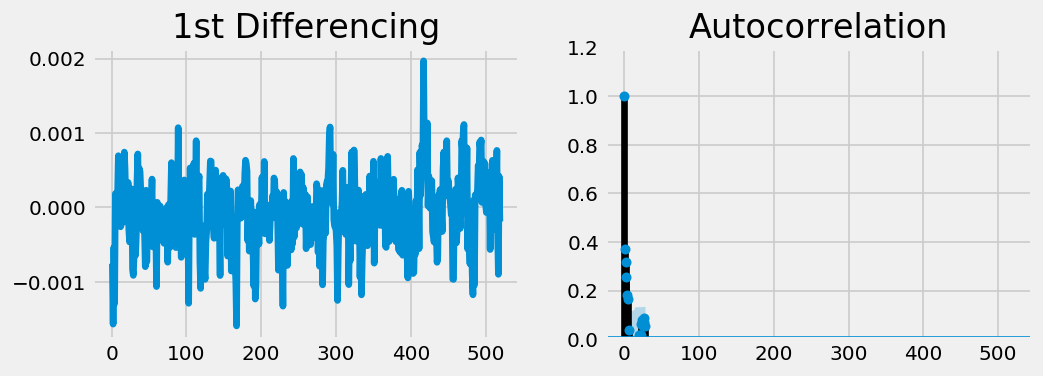

In [250]:
#MA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df1.MASTER.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df1.MASTER.diff().dropna(), ax=axes[1])

plt.show()

In [305]:
#ARIMA Model
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df1.MASTER, order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:               D.MASTER   No. Observations:                  519
Model:                 ARIMA(1, 1, 2)   Log Likelihood                3292.708
Method:                       css-mle   S.D. of innovations              0.000
Date:                Mon, 23 Mar 2020   AIC                          -6575.415
Time:                        20:16:55   BIC                          -6554.156
Sample:                             1   HQIC                         -6567.087
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -7.868e-05    4.4e-05     -1.788      0.074      -0.000    7.55e-06
ar.L1.D.MASTER     0.7570      0.058     13.083      0.000       0.644       0.870
ma.L1.D.MASTER    -0.4926      0.071

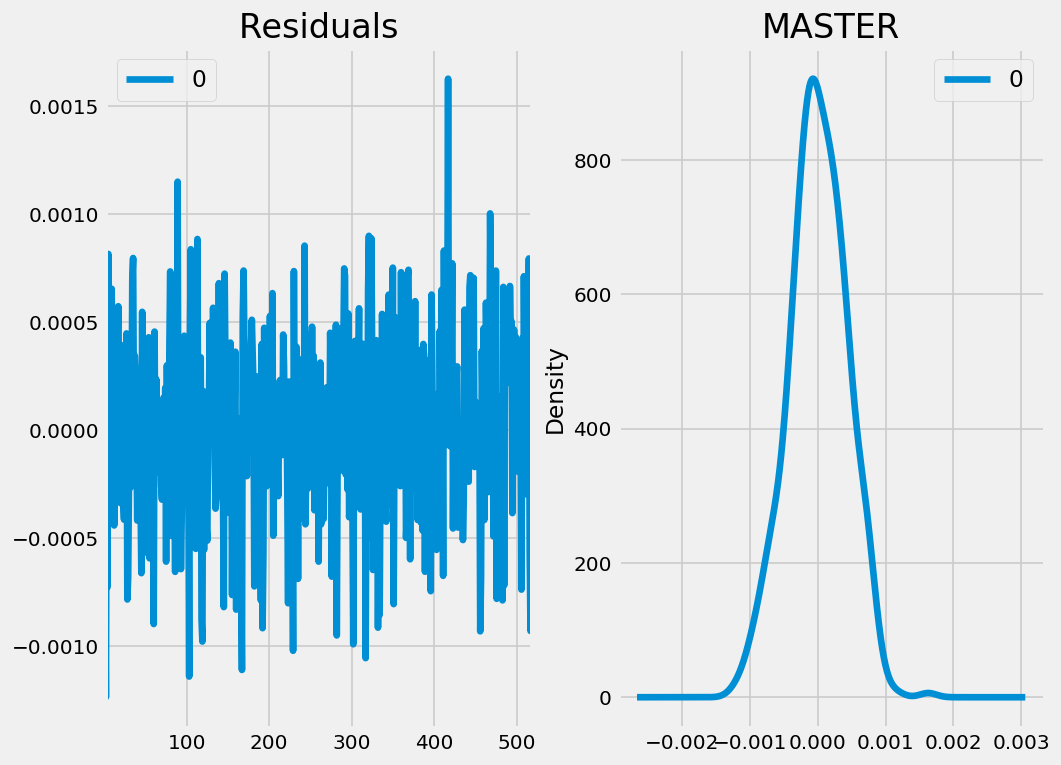

In [306]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='MASTER', ax=ax[1])
plt.show()

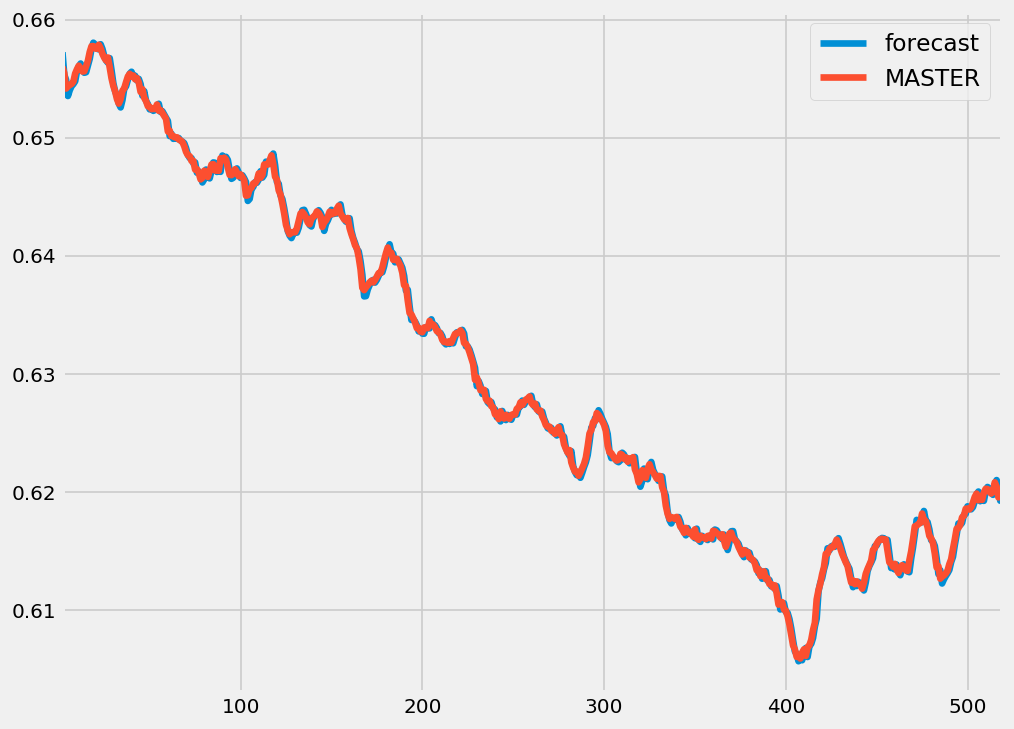

In [307]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

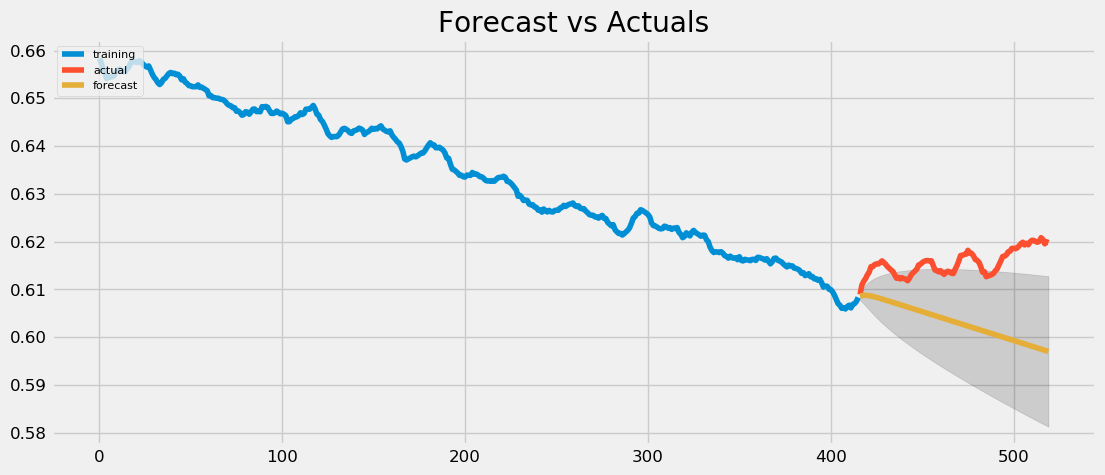

In [257]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df1.MASTER[:416]
test = df1.MASTER[416:]

# Build Model  
model = ARIMA(train, order=(1,1,2))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(104, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

                             ARIMA Model Results                              
Dep. Variable:              D2.MASTER   No. Observations:                  414
Model:                 ARIMA(3, 2, 1)   Log Likelihood                2613.112
Method:                       css-mle   S.D. of innovations              0.000
Date:                Mon, 23 Mar 2020   AIC                          -5214.224
Time:                        12:37:55   BIC                          -5190.068
Sample:                             2   HQIC                         -5204.671
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             3.83e-06   9.83e-06      0.390      0.697   -1.54e-05    2.31e-05
ar.L1.D2.MASTER    -0.4970      0.621     -0.801      0.424      -1.714       0.720
ar.L2.D2.MASTER    -0.2822      

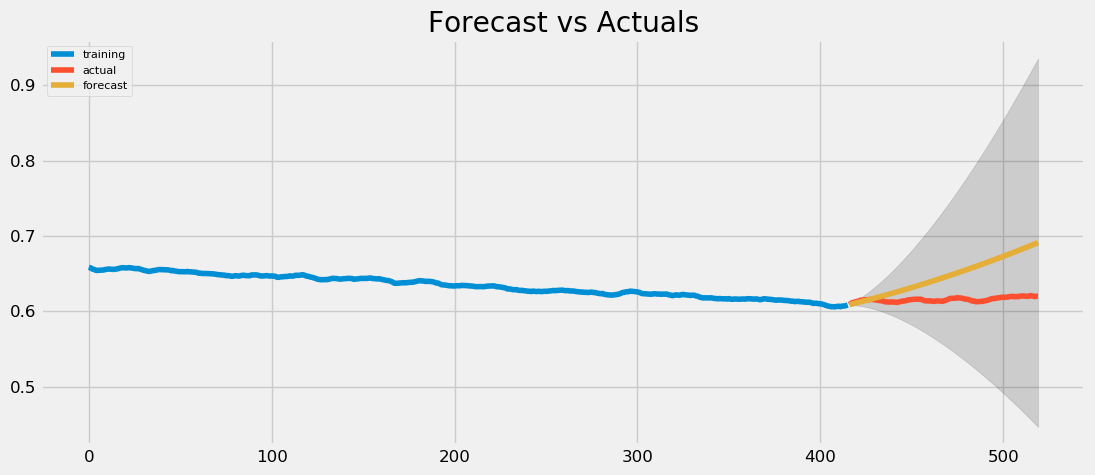

In [258]:
# Build Model
model = ARIMA(train, order=(3, 2, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(104, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [260]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)

{'mape': 0.050768924763105946,
 'me': 0.03103531400615507,
 'mae': 0.03131680896767646,
 'mpe': 0.050310084169462636,
 'rmse': 0.03808455708152421,
 'acf1': 0.973674505368653,
 'corr': 0.7628318890847194,
 'minmax': 0.0472628817809817}